<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/01%20howto.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

You can run the code examples in [Google Colab](https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/01%20howto.ipynb).

**To install the package:**

In [ ]:
!pip install okama

import okama and matplotlib packages ...

In [6]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.0, 6.0]

import okama as ok

## Get information about a single asset

You can start with getting general information about a single asset / index.

In [2]:
one_asset = ok.Asset("VOO.US")
one_asset

symbol                         VOO.US
name             Vanguard S&P 500 ETF
country                           USA
exchange                    NYSE ARCA
currency                          USD
type                              ETF
isin                     US9229083632
first date                    2010-10
last date                     2025-06
period length                   14.70
dtype: object

In [3]:
# live (20 min delay) price
one_asset.price

554.07

In [7]:
# dividends history
one_asset.dividends.tail(10)

date
2024-06    1.7835
2024-07    0.0000
2024-08    0.0000
2024-09    1.6386
2024-10    0.0000
2024-11    0.0000
2024-12    1.7385
2025-01    0.0000
2025-02    0.0000
2025-03    1.8121
Freq: M, Name: VOO.US, dtype: float64

## Financial Database: Tickers & Namespaces

If you doubt about ticker availability or asset name, check it with `search`:

In [8]:
ok.search("exxon")

,symbol,ticker,name,country,exchange,currency,type,isin
0,XONA.F,XONA,Exxon Mobil Corporation,Germany,F,EUR,Common Stock,US30231G1022
1,XONA.STU,XONA,EXXON MOBIL (XONA.SG),Germany,STU,EUR,Common Stock,US30231G1022
2,XONA.XETRA,XONA,Exxon Mobil Corporation,Germany,XETRA,EUR,Common Stock,US30231G1022
3,XONA.XETR,XONA,Exxon Mobil Corporation,Germany,XETR,EUR,Common Stock,US30231G1022
4,XONA.XSTU,XONA,EXXON MOBIL (XONA.SG),Germany,XSTU,EUR,Common Stock,US30231G1022
5,XOM.US,XOM,Exxon Mobil Corp,USA,NYSE,USD,Common Stock,US30231G1022
6,XONA.XFRA,XONA,Exxon Mobil Corporation,Germany,XFRA,EUR,Common Stock,US30231G1022


Namespase is a set of characters after the period in the ticker (SPY**.US**).

Namespaces are based on MIC (Market Identifier Codes) and okama own code systems for macro parameters.

In [9]:
# available namespaces
ok.namespaces

{'CBR': 'Central Banks official currency exchange rates',
 'CC': 'Cryptocurrency pairs with USD',
 'COMM': 'Commodities prices',
 'FX': 'FOREX currency market',
 'INDX': 'Indexes',
 'INFL': 'Inflation',
 'LSE': 'London Stock Exchange',
 'MOEX': 'Moscow Exchange',
 'PF': 'Investment Portfolios',
 'PIF': 'Russian open-end mutual funds',
 'RATE': 'Bank deposit rates',
 'RATIO': 'Financial ratios',
 'RE': 'Real estate prices',
 'US': 'US Stock Exchanges and mutual funds',
 'XAMS': 'Euronext Amsterdam',
 'XETR': 'XETRA Exchange',
 'XFRA': 'Frankfurt Stock Exchange',
 'XSTU': 'Stuttgart Exchange',
 'XTAE': 'Tel Aviv Stock Exchange (TASE)'}

In [10]:
# available symbols in namespace
ok.symbols_in_namespace("INDX")

,symbol,ticker,name,country,exchange,currency,type,isin
0,000906.INDX,000906,China Securities 800,China,INDX,USD,INDEX,
1,0O7N.INDX,0O7N,Scale All Share GR EUR,Germany,INDX,EUR,INDEX,
2,3LHE.INDX,3LHE,ESTX 50 Corporate Bond TR,Greece,INDX,EUR,INDEX,
3,5SP2550.INDX,5SP2550,S&P 500 Retailing (Industry Group),USA,INDX,USD,INDEX,
4,ADVA.INDX,ADVA,AMEX Advancing Stocks,Unknown,INDX,USD,INDEX,
...,...,...,...,...,...,...,...,...
1776,XU100.INDX,XU100,BIST 100,Turkey,INDX,TRY,INDEX,
1777,XUSIN.INDX,XUSIN,BIST Industrials,Turkey,INDX,TRY,INDEX,
1778,XUSRD.INDX,XUSRD,BIST Sustainability,Turkey,INDEX,TRY,INDEX,
1779,XUTEK.INDX,XUTEK,BIST Technology,Turkey,INDEX,TRY,INDEX,


## Compare assets from different stock markets

`AssetList` is used to compare different type of stocks, indexes, currencies, or commodities. Asset performance is adjusted to the **base currency** (USD is default).

In [11]:
ls = ["SPY.US", "BND.US", "GC.COMM", "EUR.FX"]
currency = "EUR"  # base currency

In [12]:
x = ok.AssetList(
    ls, ccy=currency, last_date="2020-01"
)  # first_date and last_date limits the Rate of Return time series
x

assets           [SPY.US, BND.US, GC.COMM, EUR.FX]
currency                                       EUR
first_date                                 2007-05
last_date                                  2020-01
period_length                   12 years, 9 months
inflation                                 EUR.INFL
dtype: object

In [13]:
x.names

{'SPY.US': 'SPDR S&P 500 ETF Trust',
 'BND.US': 'Vanguard Total Bond Market Index Fund ETF Shares',
 'GC.COMM': 'Gold (COMEX)',
 'EUR.FX': 'US Dollar/Euro FX Cross Rate'}

lets see the accumulated return and comapare it with the inflation.

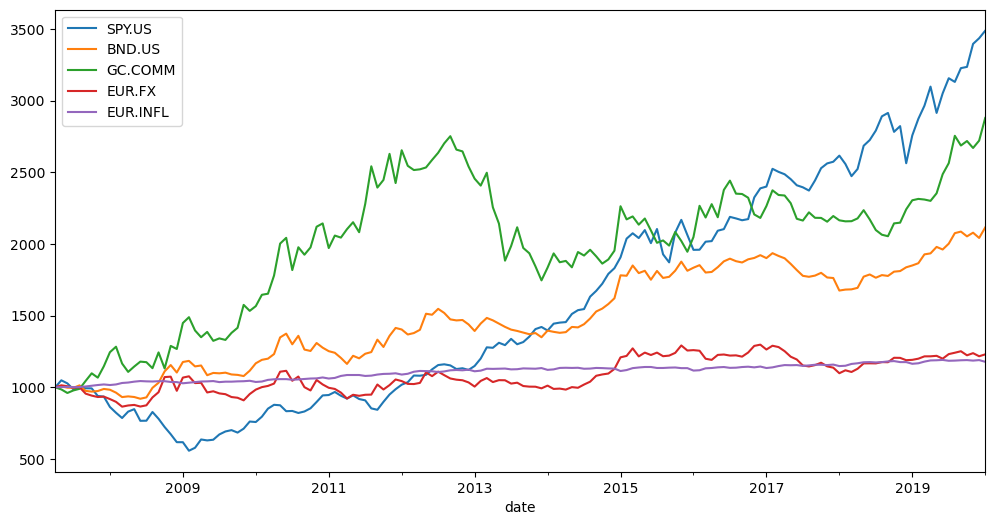

In [14]:
x.wealth_indexes.plot();

Drawdowns history is availably and easy to see

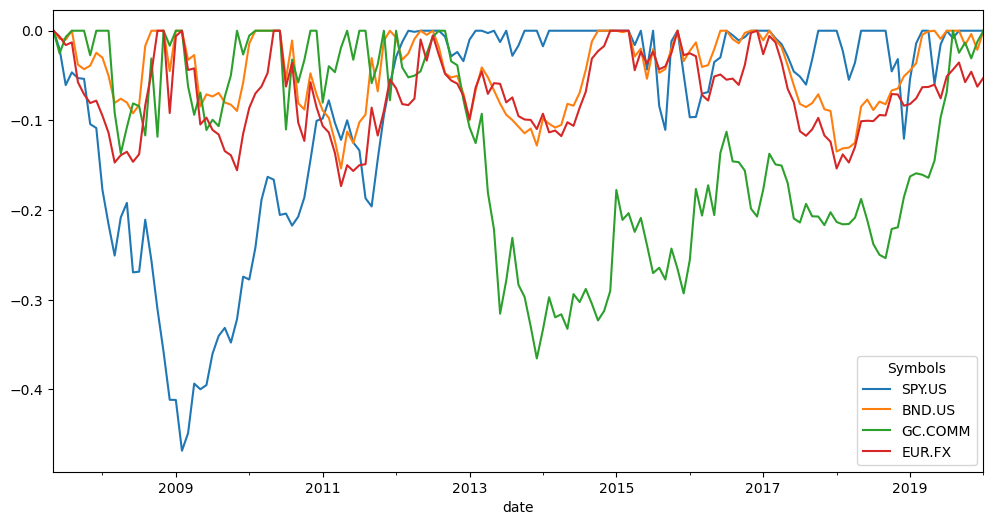

In [15]:
x.drawdowns.plot();

See the dividend yield history for all the assets in the list.

In [17]:
x.dividend_yield.tail()

,SPY.US,BND.US,GC.COMM,EUR.FX
2019-09,0.017979,0.026646,0.0,0
2019-10,0.017932,0.027154,0.0,0
2019-11,0.017084,0.026846,0.0,0
2019-12,0.017484,0.027272,0.0,0
2020-01,0.017221,0.026330,0.0,0


... or plot the same results

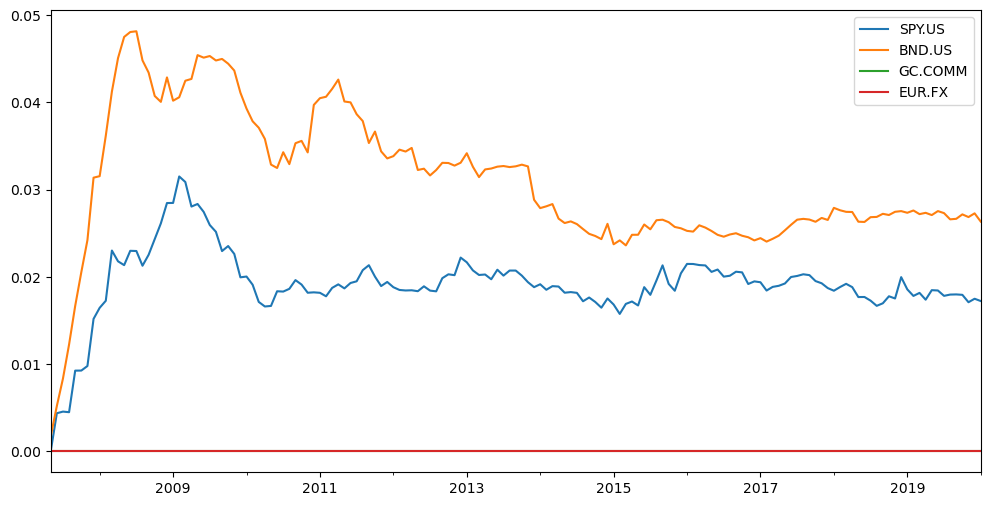

In [18]:
x.dividend_yield.plot();

_describe_ method shows all the main parameters (risk metrics, rate of return etc.) for the list of assets.

In [19]:
x.describe(years=[1, 10])  # You can specify the period or leave the default: 1, 5 and 10 years

,property,period,SPY.US,BND.US,GC.COMM,EUR.FX,inflation
0,Compound return,YTD,0.015294,0.035811,0.058055,0.0107,-0.01
1,CAGR,1 years,0.264954,0.143258,0.249053,0.031992,0.011915
2,CAGR,10 years,0.164912,0.061216,0.062749,0.022543,0.012802
3,CAGR,"12 years, 9 months",0.10295,0.060522,0.086479,0.016364,0.01294
4,Annualized mean return,"12 years, 9 months",0.113061,0.065552,0.10247,0.021663,NaN
5,Dividend yield,LTM,0.017221,0.02633,0.0,0.0,NaN
6,Risk,"12 years, 9 months",0.150422,0.104673,0.19112,0.105235,NaN
7,CVAR,"12 years, 9 months",0.330952,0.128223,0.3078,0.155073,NaN
8,Max drawdowns,"12 years, 9 months",-0.468342,-0.153572,-0.365515,-0.173337,NaN
9,Max drawdowns dates,"12 years, 9 months",2009-02,2011-04,2013-12,2011-04,NaN


### Correlation Matrix

If you need to check the correlation (or covariance) between assets returns, it's easy to use native Pandas functions.

Monthly rate of return time series are available with `.assets_ror` property:

In [21]:
x.assets_ror.tail()

Symbols,SPY.US,BND.US,GC.COMM,EUR.FX
date,,,,
2019-09,0.030714,0.005237,-0.024587,0.0084
2019-10,0.002680,-0.015959,0.011607,-0.0227
2019-11,0.049567,0.012495,-0.017791,0.0123
2019-12,0.011605,-0.017688,0.019174,-0.0174
2020-01,0.015294,0.035811,0.058055,0.0107


The correlation matrix is obtained by `x.ror.corr()`

In [22]:
x.assets_ror.corr()

Symbols,SPY.US,BND.US,GC.COMM,EUR.FX
Symbols,,,,
SPY.US,1.000000,0.179648,-0.085197,0.211605
BND.US,0.179648,1.000000,0.339629,0.907696
GC.COMM,-0.085197,0.339629,1.000000,0.185143
EUR.FX,0.211605,0.907696,0.185143,1.000000


Covariance matrix:

In [23]:
x.assets_ror.cov()

Symbols,SPY.US,BND.US,GC.COMM,EUR.FX
Symbols,,,,
SPY.US,0.001537,0.000200,-0.000167,0.000246
BND.US,0.000200,0.000809,0.000484,0.000767
GC.COMM,-0.000167,0.000484,0.002511,0.000276
EUR.FX,0.000246,0.000767,0.000276,0.000883


Rolling correlation with the benchmark is useful to see the correlation patterns for shorter periods.  
The benchmark (index) should be on the first place in the AssetList (SPY.US in this example).

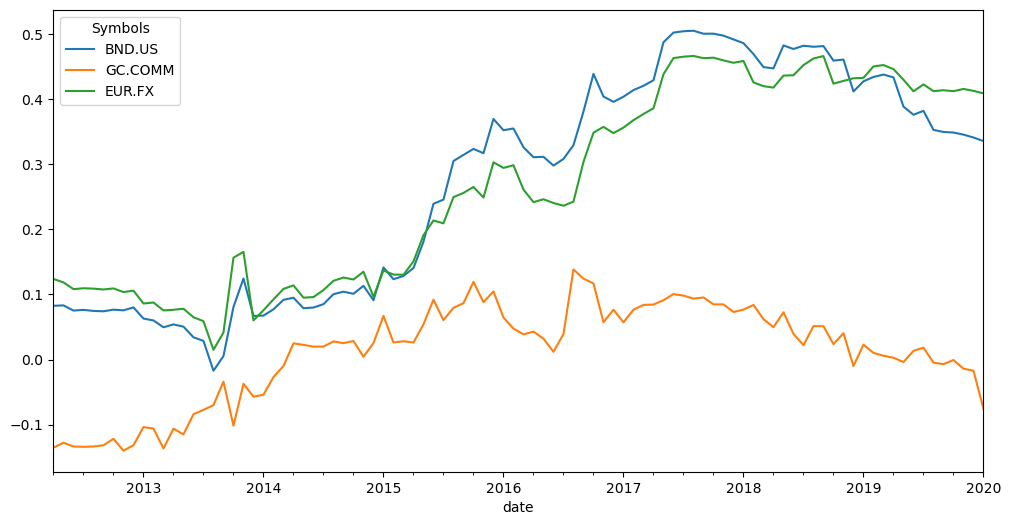

In [25]:
x.index_corr(rolling_window=12 * 5).plot();

## Basic portfolio methods

Lets create a portfolio with 3 assets and base currency USD. We need to specify weigts.

In [26]:
tickers = [
    "VNQ.US",
    "DBXD.XFRA",
    "MCFTR.INDX",
]  # we can create lists of assets and portfolio containing general type of assets and **indexes**
w = [0.5, 0.25, 0.25]
currency = "USD"

In [27]:
y = ok.Portfolio(tickers, ccy=currency, weights=w)
y

symbol                                     portfolio_2399.PF
assets                       [VNQ.US, DBXD.XFRA, MCFTR.INDX]
weights                                    [0.5, 0.25, 0.25]
rebalancing_period                                     month
rebalancing_abs_deviation                               None
rebalancing_rel_deviation                               None
currency                                                 USD
inflation                                           USD.INFL
first_date                                           2007-02
last_date                                            2025-05
period_length                             18 years, 4 months
dtype: object

In [28]:
y.table

,asset name,ticker,weights
0,Vanguard Real Estate Index Fund ETF Shares,VNQ.US,0.50
1,Xtrackers - DAX UCITS ETF,DBXD.XFRA,0.25
2,MOEX Russia Total Return Index,MCFTR.INDX,0.25


Portfolio has the same property `.wealth_index` (accumulated return) as AssetList objects.

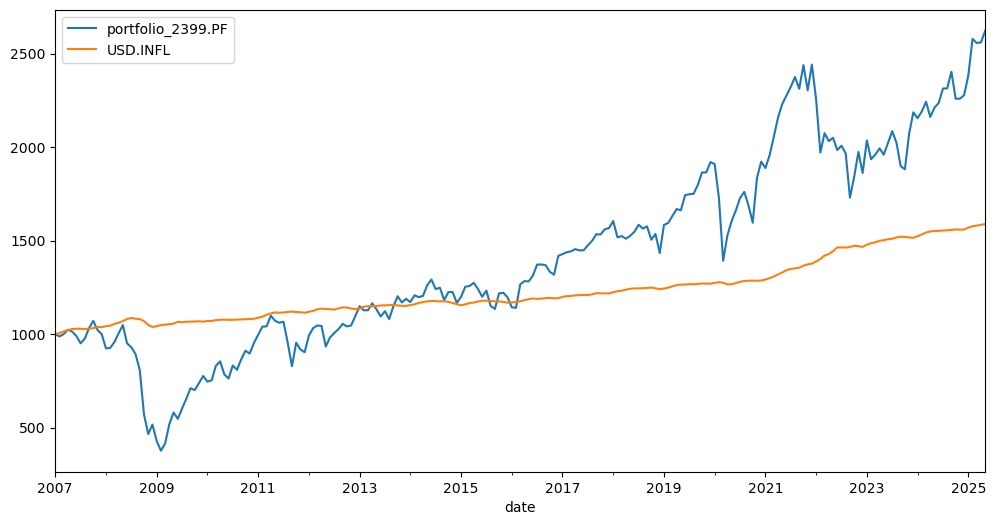

In [29]:
y.wealth_index.plot();

### Risk metrics

You can use risk(volatility or standard deviation), semideviation, max drawdown, var and cvar metrics.

In [31]:
y.risk_annual.tail()

date
2025-01    0.222730
2025-02    0.223914
2025-03    0.223256
2025-04    0.222683
2025-05    0.222412
Freq: M, Name: portfolio_2399.PF, dtype: float64

In [32]:
y.semideviation_annual

np.float64(0.17252954830415226)

In [33]:
y.get_var_historic(level=1)

np.float64(0.5429878552259061)

In [34]:
y.get_cvar_historic(level=5)

np.float64(0.46925923391795993)

In [35]:
y.drawdowns.min()

np.float64(-0.648114355818486)

... another useful rist metric is drawdown recovery period - `.recovery_period`.  
It's useful to see the max recovery period for the portfolio.

In [37]:
y.recovery_period.max() / 12  # years

np.float64(3.4166666666666665)

`.describe` shows main properties for the portfolio in different trailing periods.

In [38]:
y.describe()

,property,period,portfolio_2399.PF,inflation
0,compound return,YTD,0.151387,0.018428
1,CAGR,1 years,0.186001,0.023529
2,CAGR,5 years,0.103271,0.046319
3,CAGR,10 years,0.077607,0.030624
4,CAGR,"18 years, 4 months",0.053989,0.025557
5,Annualized mean return,"18 years, 4 months",0.077093,NaN
6,Dividend yield,LTM,0.020337,NaN
7,Risk,"18 years, 4 months",0.222412,NaN
8,CVAR,"18 years, 4 months",0.567506,NaN
9,Max drawdown,"18 years, 4 months",-0.648114,NaN


### Forecasting return

Monte Carlo forecast for normal distrubution.  
`.plot_forecast_monte_carlo` plots N random wealth indexes according to given return distribution.

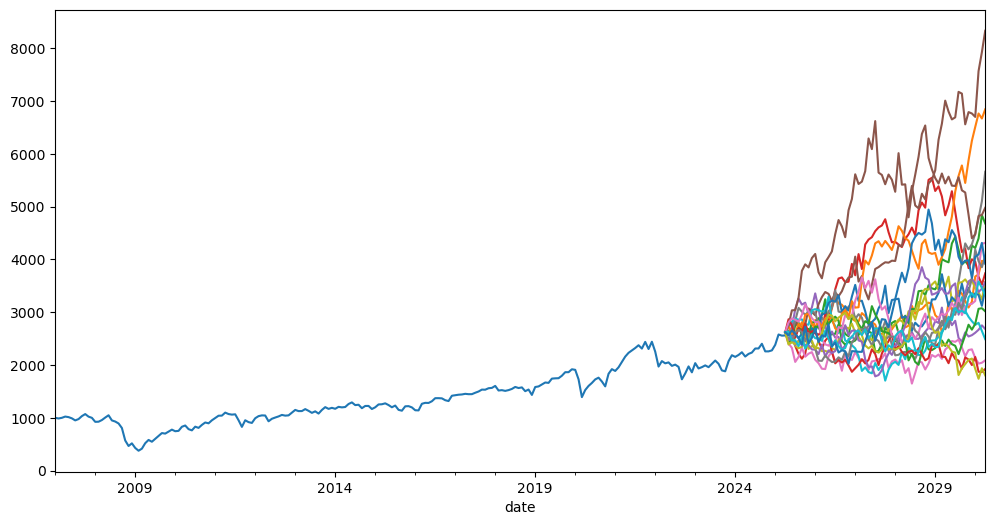

In [39]:
y.plot_forecast_monte_carlo(distr="norm", years=5, n=20);

For normal distribution it's easy to see forecasted accumulated return for a given set of percentiles.

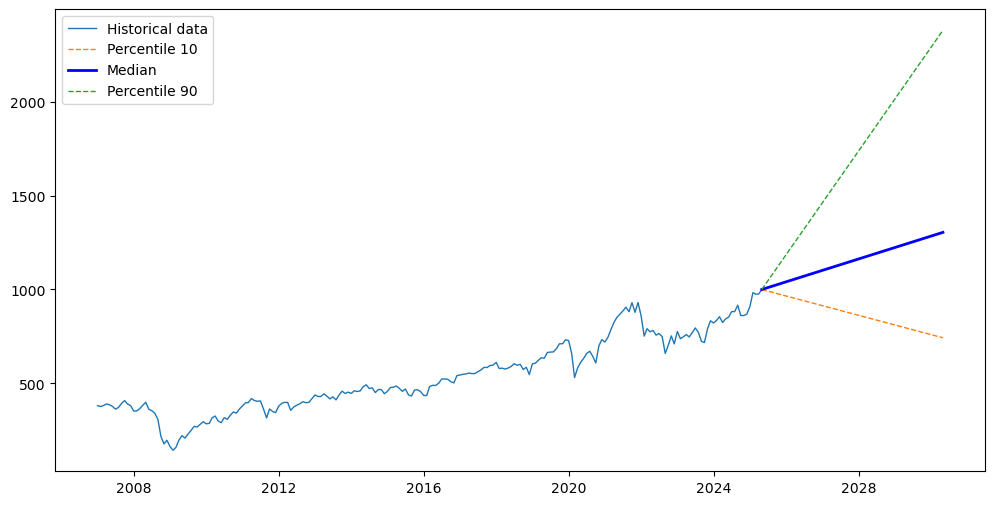

In [40]:
y.plot_forecast(
    years=5, today_value=1000, percentiles=[10, 50, 90]
);  # lognormal or historical distribution can be used with "distr" argument

**More examples of forecasting portfolio perfomance are available in [07 forecasting.ipynb](https://github.com/mbk-dev/okama/blob/master/examples/07%20forecasting.ipynb).**